In [0]:
retrain = False
days_pred = 7
days_disp = 21

# !pip install countryinfo

In [2]:
import glob
import os
import urllib

for csvpath in glob.iglob(os.path.join('./', '*.csv')):
  os.remove(csvpath)

urllib.request.urlretrieve("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", "time_series_covid19_confirmed_global.csv")
urllib.request.urlretrieve("https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv", "us-counties.csv")
urllib.request.urlretrieve("https://github.com/nytimes/covid-19-data/raw/master/us-states.csv", "us-states.csv")

('us-states.csv', <http.client.HTTPMessage at 0x7fbf92fdaa90>)

In [3]:
import pandas as pd
from dateutil import parser

df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region']=='US']
df = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

USAdata = "var USA = ["
for (columnName, columnData) in df.iteritems():
  datadate = parser.parse(columnName)
  USAdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(columnData.values[0])+'},'
USAdata += "];"
print(USAdata)

var USA = [{"DateTime":"2020-01-22","Value":1},{"DateTime":"2020-01-23","Value":1},{"DateTime":"2020-01-24","Value":2},{"DateTime":"2020-01-25","Value":2},{"DateTime":"2020-01-26","Value":5},{"DateTime":"2020-01-27","Value":5},{"DateTime":"2020-01-28","Value":5},{"DateTime":"2020-01-29","Value":5},{"DateTime":"2020-01-30","Value":5},{"DateTime":"2020-01-31","Value":7},{"DateTime":"2020-02-01","Value":8},{"DateTime":"2020-02-02","Value":8},{"DateTime":"2020-02-03","Value":11},{"DateTime":"2020-02-04","Value":11},{"DateTime":"2020-02-05","Value":11},{"DateTime":"2020-02-06","Value":11},{"DateTime":"2020-02-07","Value":11},{"DateTime":"2020-02-08","Value":11},{"DateTime":"2020-02-09","Value":11},{"DateTime":"2020-02-10","Value":11},{"DateTime":"2020-02-11","Value":12},{"DateTime":"2020-02-12","Value":12},{"DateTime":"2020-02-13","Value":13},{"DateTime":"2020-02-14","Value":13},{"DateTime":"2020-02-15","Value":13},{"DateTime":"2020-02-16","Value":13},{"DateTime":"2020-02-17","Value":13},{"

In [4]:
import pandas as pd
from dateutil import parser

df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']

NYdata = "var NY = ["
for index, row in df.iterrows():
  datadate = parser.parse(row['date'])
  NYdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(row['cases'])+'},'
NYdata += "];"
print(NYdata)

var NY = [{"DateTime":"2020-03-01","Value":1},{"DateTime":"2020-03-02","Value":1},{"DateTime":"2020-03-03","Value":2},{"DateTime":"2020-03-04","Value":11},{"DateTime":"2020-03-05","Value":22},{"DateTime":"2020-03-06","Value":44},{"DateTime":"2020-03-07","Value":89},{"DateTime":"2020-03-08","Value":106},{"DateTime":"2020-03-09","Value":142},{"DateTime":"2020-03-10","Value":173},{"DateTime":"2020-03-11","Value":217},{"DateTime":"2020-03-12","Value":326},{"DateTime":"2020-03-13","Value":421},{"DateTime":"2020-03-14","Value":610},{"DateTime":"2020-03-15","Value":732},{"DateTime":"2020-03-16","Value":950},{"DateTime":"2020-03-17","Value":1374},{"DateTime":"2020-03-18","Value":2382},{"DateTime":"2020-03-19","Value":4152},{"DateTime":"2020-03-20","Value":7102},{"DateTime":"2020-03-21","Value":10356},{"DateTime":"2020-03-22","Value":15168},{"DateTime":"2020-03-23","Value":20875},{"DateTime":"2020-03-24","Value":25665},{"DateTime":"2020-03-25","Value":33066},{"DateTime":"2020-03-26","Value":389

In [5]:
import pandas as pd
from dateutil import parser

df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']

Dutchessdata = "var Dutchess = ["
for index, row in df.iterrows():
  datadate = parser.parse(row['date'])
  Dutchessdata += '{"DateTime":"'+str(datadate.date())+'","Value":'+str(row['cases'])+'},'
Dutchessdata += "];"
print(Dutchessdata)

var Dutchess = [{"DateTime":"2020-03-12","Value":1},{"DateTime":"2020-03-13","Value":3},{"DateTime":"2020-03-14","Value":4},{"DateTime":"2020-03-15","Value":7},{"DateTime":"2020-03-16","Value":10},{"DateTime":"2020-03-17","Value":16},{"DateTime":"2020-03-18","Value":20},{"DateTime":"2020-03-19","Value":31},{"DateTime":"2020-03-20","Value":36},{"DateTime":"2020-03-21","Value":49},{"DateTime":"2020-03-22","Value":82},{"DateTime":"2020-03-23","Value":100},{"DateTime":"2020-03-24","Value":124},{"DateTime":"2020-03-25","Value":153},{"DateTime":"2020-03-26","Value":190},{"DateTime":"2020-03-27","Value":225},{"DateTime":"2020-03-28","Value":262},{"DateTime":"2020-03-29","Value":320},{"DateTime":"2020-03-30","Value":392},{"DateTime":"2020-03-31","Value":484},{"DateTime":"2020-04-01","Value":547},];


Save data for website

In [0]:
with open("covid19_data.js", "w") as text_file:
  text_file.write(USAdata+"\n"+NYdata+"\n"+Dutchessdata+"\n")

# Data Preparation for Training

##Prepare the data as cases in terms of their population: cases/population
###Assumption: this can help compare progression in other countries

###Aggregate countries with divisions by territories (don't have a way of directly obtaining their population)

In [7]:
from countryinfo import CountryInfo

df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df.drop(columns=['Province/State', 'Lat', 'Long'])
df.replace('Bahamas', 'The Bahamas', inplace=True)
df.replace('Cabo Verde', 'Cape Verde', inplace=True)
df.replace('Congo (Kinshasa)', 'Democratic Republic of the Congo', inplace=True)
df.replace('Congo (Brazzaville)', 'Republic of the Congo', inplace=True)
df.replace('Cote d\'Ivoire', 'Ivory Coast', inplace=True)
df.replace('Czechia', 'Czech Republic', inplace=True)
df.replace('Eswatini', 'Swaziland', inplace=True)
df.replace('Gambia', 'The Gambia', inplace=True)
df.replace('Korea, South', 'South Korea', inplace=True)
df.replace('North Macedonia', 'Republic of Macedonia', inplace=True)
df.replace('Taiwan*', 'Taiwan', inplace=True)
df.replace('US', 'United States', inplace=True)

df = df.groupby(['Country/Region']).sum()
gdf = df.copy()

for index, row in df.iterrows():
  # print(index)
  country = CountryInfo(index)
  try:    
    gdf.loc[index] = gdf.loc[index].divide(country.population()).multiply(100.0)
  except:
    print('Coult not retrieve the population of:', index)
    gdf.drop(labels=index, inplace=True)



Coult not retrieve the population of: Andorra
Coult not retrieve the population of: Burma
Coult not retrieve the population of: Diamond Princess
Coult not retrieve the population of: Holy See
Coult not retrieve the population of: Kosovo
Coult not retrieve the population of: MS Zaandam
Coult not retrieve the population of: Montenegro
Coult not retrieve the population of: Serbia
Coult not retrieve the population of: Timor-Leste
Coult not retrieve the population of: West Bank and Gaza


In [8]:
gdf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000015,0.000015,0.000019,0.000027,0.000027,0.000027,0.000042,0.000061,0.000081,0.000085,0.000085,0.000085,0.000092,0.000092,0.000154,0.000154,0.000284,0.000323,0.000361,0.000423,0.000423,0.000461,0.000653,0.000669,0.000911
Albania,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000069,0.000345,0.000414,0.000794,0.001140,0.001312,0.001450,0.001761,0.001899,0.002037,0.002210,0.002417,0.002624,0.003073,0.003591,0.004247,0.005042,0.006008,0.006423,0.006803,0.007321,0.007700,0.008391,0.008944
Algeria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000008,0.000013,0.000031,0.000031,0.000044,0.000044,0.000049,0.000052,0.000052,0.000052,0.000062,0.000067,0.000096,0.000124,0.000140,0.000155,0.000191,0.000225,0.000233,0.000359,0.000519,0.000594,0.000682,0.000780,0.000948,0.001057,0.001173,0.001320,0.001509,0.001850,0.002189
Angola,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000008,0.000008,0.000012,0.000012,0.000012,0.000016,0.000016,0.000021,0.000029,0.000029,0.000029,0.000033
Antigua and Barbuda,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001159,0.001159,0.001159,0.001159,0.001159,0.001159,0.001159,0.001159,0.001159,0.001159,0.003476,0.003476,0.003476,0.008112,0.008112,0.008112,0.008112,0.008112,0.008112,0.008112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [9]:
import numpy as np

# checks for duplicates in O(n^2)
def arreq_in_list(myarr, list_arrays):
    return next((True for elem in list_arrays if np.array_equal(elem, myarr)), False)

length = 21   # 21 really, but the last element will be target
data_seq = []

for index, row in gdf.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    if sum(seq[:-1]) > 0:
      if arreq_in_list(seq, data_seq) == False:   # avoid duplicates
        data_seq.append(seq)
    i += 1
  print(len(data_seq), index)

data_seq = np.vstack(data_seq)

37 Afghanistan
60 Albania
96 Algeria
108 Angola
127 Antigua and Barbuda
156 Argentina
187 Armenia
237 Australia
273 Austria
304 Azerbaijan
341 Bahrain
365 Bangladesh
380 Barbados
413 Belarus
459 Belgium
468 Belize
484 Benin
510 Bhutan
531 Bolivia
558 Bosnia and Herzegovina
560 Botswana
595 Brazil
618 Brunei
642 Bulgaria
664 Burkina Faso
665 Burundi
696 Cambodia
722 Cameroon
772 Canada
784 Cape Verde
801 Central African Republic
814 Chad
843 Chile
893 China
919 Colombia
945 Costa Rica
981 Croatia
1001 Cuba
1024 Cyprus
1055 Czech Republic
1076 Democratic Republic of the Congo
1110 Denmark
1124 Djibouti
1134 Dominica
1165 Dominican Republic
1196 Ecuador
1243 Egypt
1256 El Salvador
1273 Equatorial Guinea
1284 Eritrea
1318 Estonia
1337 Ethiopia
1350 Fiji
1394 Finland
1444 France
1462 Gabon
1497 Georgia
1547 Germany
1565 Ghana
1600 Greece
1610 Grenada
1628 Guatemala
1647 Guinea
1654 Guinea-Bissau
1674 Guyana
1686 Haiti
1707 Honduras
1735 Hungary
1768 Iceland
1812 India
1842 Indonesia
1884 Ir

In [0]:
X = data_seq[:,:-1]
y = data_seq[:,-1]

## Let's train an SVR
### (takes about one hour)

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


X_scaler = StandardScaler()
X_scaler.fit(X)
Xs = X_scaler.transform(X)
y_scaler = StandardScaler()
y_scaler.fit(y.reshape(-1, 1))
ys = y_scaler.transform(y.reshape(-1, 1)).ravel()

gs = GridSearchCV(SVR(kernel='poly', max_iter=100000),
                  param_grid={'C':       np.logspace(-5, 15, 11, base=2),
                              'degree':  [1, 2, 3, 4],
                              'epsilon': [1e-04, 1e-05]},
                  scoring='neg_mean_absolute_error', return_train_score=True, 
                  verbose=2, n_jobs=-1)
if retrain :
  gs.fit(Xs, ys)
  results = gs.cv_results_
  print(gs.best_params_)
  best_C = gs.best_params_['C']
  best_degree = gs.best_params_['degree']
  best_epsilon = gs.best_params_['epsilon']
else:
  # best_C = 2048.0
  # best_gamma = 0.000030517578125
  # best_epsilon = 0.001
  best_C = 2.0
  best_degree = 1
  best_epsilon = 1e-05

Getting the standard error

Text(0.5, 1.0, 'CV MSE = 0.00001, $\\mu=$-0.00006, $\\sigma=$0.00294')

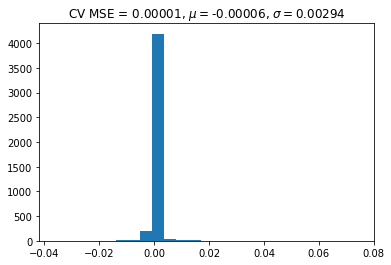

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
y_y_hat = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  clf = SVR(C=best_C, kernel='poly', degree=best_degree, epsilon=best_epsilon)
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  for k in range(len(y_hat)):
    y_y_hat.append(y_test[k]-y_hat[k])

y_y_hat = np.array(y_y_hat)  

mse = np.mean(np.square(y_y_hat))
errmu = np.mean(y_y_hat)
stdev = np.std(y_y_hat)
fig = plt.hist(y_y_hat, bins=25)
plt.title('CV MSE = %0.5f, $\mu=$%1.5f, $\sigma=$%1.5f'%(mse,errmu,stdev))

Train with best known parameters

In [13]:
import joblib

if retrain :
  clf = SVR(C=best_C, kernel='poly', degree=best_degree, epsilon=best_epsilon)
  clf.fit(Xs, ys)
  print(clf.score(Xs, ys))
  joblib.dump(clf, "svr.pkl") 
else:
  clf = joblib.load("svr.pkl")
  print(clf.score(Xs, ys))


0.9969095581658628


### Predict on US data

In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.iterrows():
  if index == 'United States':
    country = CountryInfo(index)
    i = 0
    while (len(row.values) > i+length):
      seq = row.values[i:i+length+1]
      sdt = list(row.index.values[i:i+length+1])
      if sum(seq[:-1]) > 0:
        inpt = seq[:-1].reshape((1, -1))
        inpt = X_scaler.transform(inpt)
        targ = seq[-1].reshape((1, -1))
        targ = y_scaler.transform(targ)        
        pred = clf.predict(inpt)
        pred_vals.append(pred)
        true_vals.append(targ)
        datadate = parser.parse(sdt[-1])
        pred_dates.append(str(datadate.date()))

      i += 1
    i = 0
    while (i < days_pred):
      datadate += datetime.timedelta(days=1)
      inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      pred_dates.append(str(datadate.date()))
      i += 1

      
pred_vals = y_scaler.inverse_transform(np.array(pred_vals).reshape(1,-1))
true_vals = y_scaler.inverse_transform(np.array(true_vals).reshape(1,-1))
true_std = y_scaler.inverse_transform(np.array(stdev).reshape(1,-1))

pred_vals = (pred_vals/100.0)*country.population()
true_vals = (true_vals/100.0)*country.population()
true_std = (true_std/100.0)*country.population()

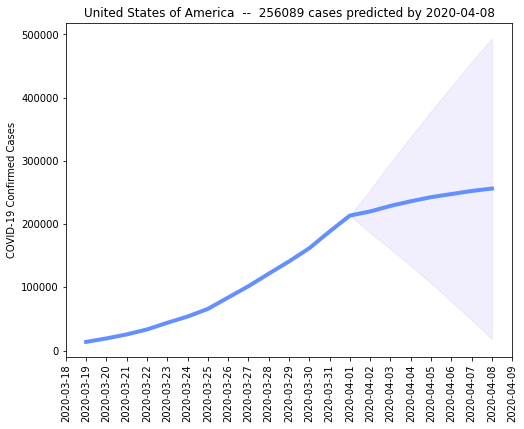

In [15]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

cdf = pd.DataFrame()
DF = pd.DataFrame()
cdf['svr_us_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
cdf = cdf.set_index(data_dates)
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#648fff")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States of America  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['svr_us_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_us_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#785ef0")
ax.xaxis.set_major_locator(days)
plt.savefig('us-svr.png', dpi=350, bbox_inches='tight')


### Predict on NY State

In [0]:
NY_POPULATION = 19540000    # from 2018 census
df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']
df = df.drop(columns=['state','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

for index, row in df.iterrows():
  datadate = parser.parse(index)
  gdf.loc[index] = gdf.loc[index].divide(NY_POPULATION).multiply(100.0)
  
datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 0.0
  i += 1

gdf.sort_index(inplace=True)


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if sum(seq[:-1]) > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = X_scaler.transform(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = y_scaler.transform(targ)        
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = clf.predict(inpt)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

      
pred_vals = y_scaler.inverse_transform(np.array(pred_vals).reshape(1,-1))
true_vals = y_scaler.inverse_transform(np.array(true_vals).reshape(1,-1))
true_std = y_scaler.inverse_transform(np.array(stdev).reshape(1,-1))

pred_vals = (pred_vals/100.0)*NY_POPULATION
true_vals = (true_vals/100.0)*NY_POPULATION
true_std = (true_std/100.0)*NY_POPULATION

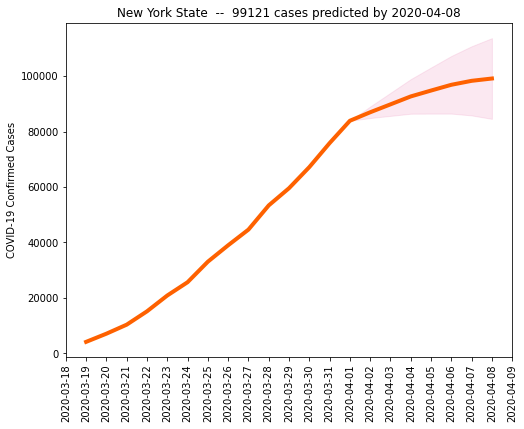

In [18]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['svr_nys_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#fe6100")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['svr_nys_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_nys_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#dc267f")
ax.xaxis.set_major_locator(days)
plt.savefig('nys-svr.png', dpi=350, bbox_inches='tight')


### Dutchess County

In [0]:
DC_POPULATION = 295568    # from 2017 census
df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']
df = df.drop(columns=['state','county','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

for index, row in df.iterrows():
  datadate = parser.parse(index)
  gdf.loc[index] = gdf.loc[index].divide(DC_POPULATION).multiply(100.0)
  
datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 0.0
  i += 1

gdf.sort_index(inplace=True)


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if sum(seq[:-1]) > 0:
      inpt = seq[:-1].reshape((1, -1))
      inpt = X_scaler.transform(inpt)
      targ = seq[-1].reshape((1, -1))
      targ = y_scaler.transform(targ)        
      pred = clf.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = clf.predict(inpt)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

      
pred_vals = y_scaler.inverse_transform(np.array(pred_vals).reshape(1,-1))
true_vals = y_scaler.inverse_transform(np.array(true_vals).reshape(1,-1))
true_std = y_scaler.inverse_transform(np.array(stdev).reshape(1,-1))

pred_vals = (pred_vals/100.0)*DC_POPULATION
true_vals = (true_vals/100.0)*DC_POPULATION
true_std = (true_std/100.0)*DC_POPULATION

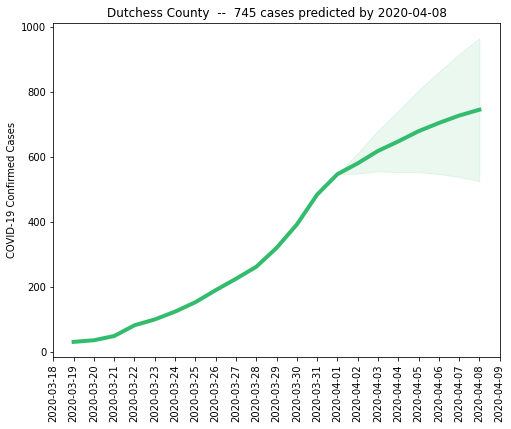

In [21]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['svr_dc_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#34bc6e")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['svr_dc_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['svr_dc_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#34bc6e")
ax.xaxis.set_major_locator(days)
plt.savefig('dutchess-svr.png', dpi=350, bbox_inches='tight')


# Lets train an LSTM

### Hyper-parameter optimization
(this will take about two hours)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2'):
  gs = GridSearchCV(
      estimator=model,
      param_grid=param_grid, 
      cv=cv, 
      n_jobs=-1, 
      scoring=scoring_fit,
      verbose=2
  )
  fitted_model = gs.fit(X_train_data, y_train_data)
  
  pred = fitted_model.predict(X_test_data)
  
  return fitted_model, pred

# Readying neural network model
def build_lstm(units = 4,
              dropout_rate = 0.1,
              optimizer = 'adam',
              loss = 'mean_squared_error'):
  net = Sequential()
  net.add(Input((X.shape[1],)))
  net.add(Reshape((1, X.shape[1])))
  net.add(BatchNormalization())
  net.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
  net.add(Dense(1, activation='relu'))
  net.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    
  return net

param_grid = {'epochs' : [10, 30],
              'batch_size' : [16, 32],
              'optimizer' : ['adam', 'rmsprop'],
              'dropout_rate' : [0.1, 0.2, 0.3],
              'units' : [8, 16, 32, 64],
              'loss' : ['mean_squared_error', 'mean_absolute_error']}

model = KerasClassifier(build_fn = build_lstm, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

if retrain :
  model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=3, scoring_fit='r2')
  print(model.best_score_)
  print(model.best_params_)

  lstm_best_params = model.best_params_
else:
  lstm_best_params = {'batch_size': 16, 
                      'dropout_rate': 0.1, 
                      'epochs': 30, 
                      'loss': 'mean_squared_error', 
                      'optimizer': 'adam', 
                      'units': 8}

In [23]:
inpt = Input((X.shape[1],))
rnpt = Reshape((1, X.shape[1]))(inpt)
bn = BatchNormalization()(rnpt)
rnn = LSTM(lstm_best_params['units'], 
           dropout=lstm_best_params['dropout_rate'], 
           recurrent_dropout=lstm_best_params['dropout_rate'])(bn)
otpt = Dense(1)(rnn)
net = Model(inpt, otpt)
print(net.summary())
net.compile(loss=lstm_best_params['loss'], optimizer=lstm_best_params['optimizer'], 
            metrics=['mse', 'mae', 'cosine_proximity'])
hist = net.fit(X, y, batch_size=lstm_best_params['batch_size'], 
               epochs=lstm_best_params['epochs'], validation_split=0.1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 21)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 21)             84        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 960       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 1,053
Trainable params: 1,011
Non-trainable params: 42
_________________________________________________________________
None
Epoch 1/30
254/254 [==============================] - 1s 4ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0153 - cosine_p

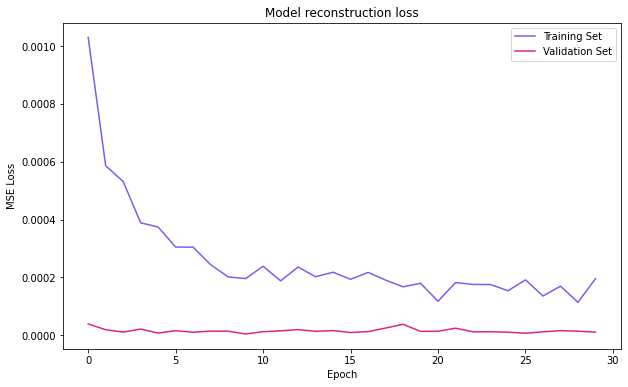

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model reconstruction loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
# plt.savefig('ch.7.ae.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()

This just calculates a confidence interval by means of the standard error

Text(0.5, 1.0, 'CV MSE = 0.00033, $\\mu=$0.00085, $\\sigma=$0.01814')

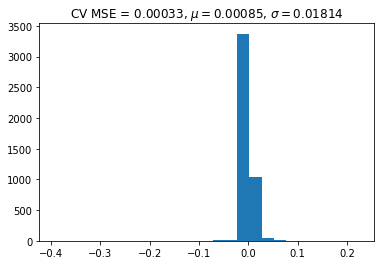

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
y_y_hat = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  net = None
  net = Model(inpt, otpt)
  net.compile(loss=lstm_best_params['loss'], optimizer=lstm_best_params['optimizer'])
  net.fit(X_train, y_train, batch_size=lstm_best_params['batch_size'], 
          epochs=lstm_best_params['epochs'], verbose=0)
  y_hat = net.predict(X_test)
  for k in range(len(y_hat)):
    y_y_hat.append(y_test[k]-y_hat[k])

y_y_hat = np.array(y_y_hat)  

mse = np.mean(np.square(y_y_hat))
errmu = np.mean(y_y_hat)
stdev = np.std(y_y_hat)
fig = plt.hist(y_y_hat, bins=25)
plt.title('CV MSE = %0.5f, $\mu=$%1.5f, $\sigma=$%1.5f'%(mse,errmu,stdev))

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Reshape, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

mdlinpt = Input((X.shape[1],))
rnpt = Reshape((1, X.shape[1]))(mdlinpt)
bn = BatchNormalization()(rnpt)
rnn = LSTM(lstm_best_params['units'], dropout=lstm_best_params['dropout_rate'], 
           recurrent_dropout=lstm_best_params['dropout_rate'])(bn)
otpt = Dense(1)(rnn)
net = Model(mdlinpt, otpt)
print(net.summary())
if retrain :
  net.compile(loss=lstm_best_params['loss'], 
              optimizer=lstm_best_params['optimizer'], 
              metrics=['mse', 'mae', 'cosine_proximity'])

  reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=20,  
                                min_delta=1e-4, mode='min')

  stop_alg = EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)

  hist = net.fit(X, y, batch_size=lstm_best_params['batch_size'], epochs=1000, 
                callbacks=[stop_alg, reduce_lr])

  net.save_weights("net.hdf5")
else:
  net.load_weights("net.hdf5")


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 21)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 21)             84        
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 960       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,053
Trainable params: 1,011
Non-trainable params: 42
_________________________________________________________________
None


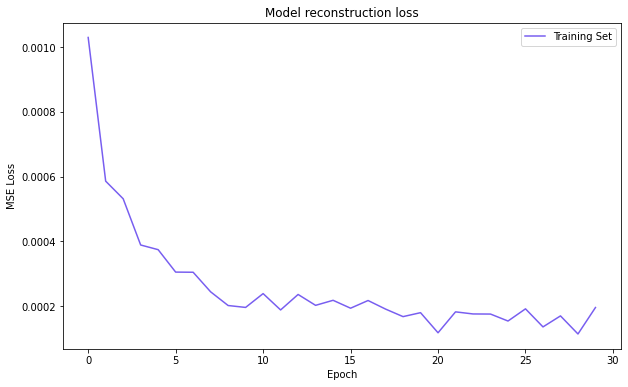

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.title('Model reconstruction loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.show()

### USA predictions

In [28]:
# reload this dataframe
from countryinfo import CountryInfo

df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df = df.drop(columns=['Province/State', 'Lat', 'Long'])
df.replace('Bahamas', 'The Bahamas', inplace=True)
df.replace('Cabo Verde', 'Cape Verde', inplace=True)
df.replace('Congo (Kinshasa)', 'Democratic Republic of the Congo', inplace=True)
df.replace('Congo (Brazzaville)', 'Republic of the Congo', inplace=True)
df.replace('Cote d\'Ivoire', 'Ivory Coast', inplace=True)
df.replace('Czechia', 'Czech Republic', inplace=True)
df.replace('Eswatini', 'Swaziland', inplace=True)
df.replace('Gambia', 'The Gambia', inplace=True)
df.replace('Korea, South', 'South Korea', inplace=True)
df.replace('North Macedonia', 'Republic of Macedonia', inplace=True)
df.replace('Taiwan*', 'Taiwan', inplace=True)
df.replace('US', 'United States', inplace=True)

df = df.groupby(['Country/Region']).sum()
gdf = df.copy()

for index, row in df.iterrows():
  # print(index)
  country = CountryInfo(index)
  try:    
    gdf.loc[index] = gdf.loc[index].divide(country.population()).multiply(100.0)
  except:
    print('Coult not retrieve the population of:', index)
    gdf.drop(labels=index, inplace=True)


Coult not retrieve the population of: Andorra
Coult not retrieve the population of: Burma
Coult not retrieve the population of: Diamond Princess
Coult not retrieve the population of: Holy See
Coult not retrieve the population of: Kosovo
Coult not retrieve the population of: MS Zaandam
Coult not retrieve the population of: Montenegro
Coult not retrieve the population of: Serbia
Coult not retrieve the population of: Timor-Leste
Coult not retrieve the population of: West Bank and Gaza


In [0]:
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7
days_disp = 21

for index, row in gdf.iterrows():
  if index == 'United States':
    country = CountryInfo(index)
    i = 0
    while (len(row.values) > i+length):
      seq = row.values[i:i+length+1]
      sdt = list(row.index.values[i:i+length+1])
      if sum(seq[:-1]) > 0:
        inpt = seq[:-1].reshape((1, -1))
        # inpt = X_scaler.transform(inpt)
        targ = seq[-1].reshape((1, -1))
        # targ = y_scaler.transform(targ)        
        pred = net.predict(inpt)[0]
        pred_vals.append(pred)
        true_vals.append(targ)
        datadate = parser.parse(sdt[-1])
        pred_dates.append(str(datadate.date()))
      i += 1
    i = 0
    pred = targ[0]
    # print(inpt, pred)
    while (i < days_pred):
      datadate += datetime.timedelta(days=1)
      inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
      pred = net.predict(inpt)[0]
      x = max(pred, inpt[0][-1]).reshape((1,)) # sneaky pred_vals.append(x)
      pred_vals.append(pred)
      pred_dates.append(str(datadate.date()))
      i += 1

pred_vals = np.array(pred_vals).reshape(1,-1)
true_vals = np.array(true_vals).reshape(1,-1)
true_std = np.array(stdev).reshape(1,-1)

pred_vals = (pred_vals/100.0)*country.population()
true_vals = (true_vals/100.0)*country.population()
true_std = (true_std/100.0)*country.population()

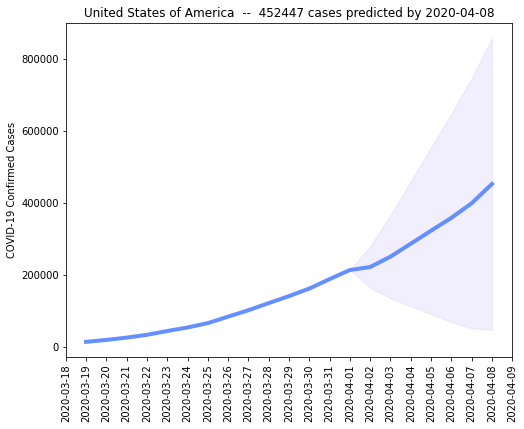

In [30]:
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]


days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_us_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#648fff")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('United States of America  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['lstm_us_cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
cdf['lstm_us_cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
DF['cum_sdt_error_p'] = data_plot[0,:]+cum_sdt_error[0,:]
DF['cum_sdt_error_n'] = (data_plot[0,:]-cum_sdt_error[0,:]).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#785ef0")
ax.xaxis.set_major_locator(days)
plt.savefig('us-lstm.png', dpi=350, bbox_inches='tight')


## NYS predictions

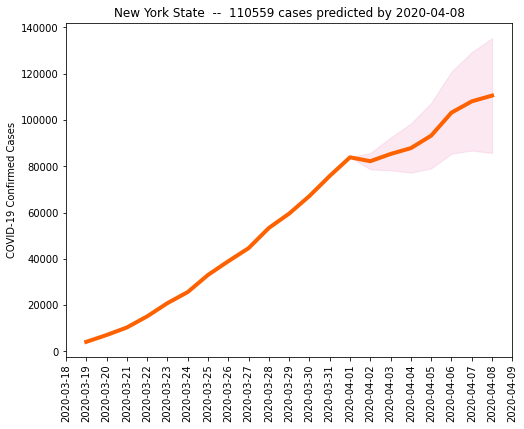

In [31]:
NY_POPULATION = 19540000    # from 2018 census
df = pd.read_csv('us-states.csv')
df = df[df['state']=='New York']
df = df.drop(columns=['state','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

for index, row in df.iterrows():
  datadate = parser.parse(index)
  gdf.loc[index] = gdf.loc[index].divide(NY_POPULATION).multiply(100.0)
  
datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 0.0
  i += 1

gdf.sort_index(inplace=True)


####
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7
days_disp = 21 

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if sum(seq[:-1]) > 0:
      inpt = seq[:-1].reshape((1, -1))
      # inpt = X_scaler.transform(inpt)
      targ = seq[-1].reshape((1, -1))
      # targ = y_scaler.transform(targ)        
      pred = net.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  pred = targ[0]
  # print(inpt, pred)
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = net.predict(inpt)[0]
    x = max(pred, inpt[0][-1]).reshape((1,)) # sneaky pred_vals.append(x)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

      
pred_vals = np.array(pred_vals).reshape(1,-1)
true_vals = np.array(true_vals).reshape(1,-1)
true_std = np.array(stdev).reshape(1,-1)

pred_vals = (pred_vals/100.0)*NY_POPULATION
true_vals = (true_vals/100.0)*NY_POPULATION
true_std = (true_std/100.0)*NY_POPULATION


####
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]


days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_nys_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#fe6100")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('New York State  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['lstm_nys_cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
cdf['lstm_nys_cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
DF['cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
DF['cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#dc267f")
ax.xaxis.set_major_locator(days)
plt.savefig('nys-lstm.png', dpi=350, bbox_inches='tight')


## Ducthess county

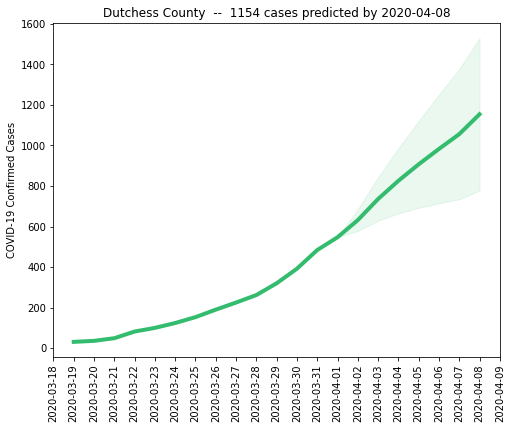

In [32]:
DC_POPULATION = 295568    # from 2017 census
df = pd.read_csv('us-counties.csv')
df = df[df['county']=='Dutchess']
df = df.drop(columns=['state','county','fips','deaths'])
df.set_index('date', inplace=True)

gdf = df.copy()

for index, row in df.iterrows():
  datadate = parser.parse(index)
  gdf.loc[index] = gdf.loc[index].divide(DC_POPULATION).multiply(100.0)
  
datadate = parser.parse(df.index[0])
i = 0
while (i < 28):
  datadate -= datetime.timedelta(days=1)
  gdf.loc[str(datadate.date())] = 0.0
  i += 1

gdf.sort_index(inplace=True)


####
import datetime

pred_dates = []
pred_vals = []
true_vals = []
days_pred = 7

for index, row in gdf.T.iterrows():
  i = 0
  while (len(row.values) > i+length):
    seq = row.values[i:i+length+1]
    sdt = list(row.index.values[i:i+length+1])
    if sum(seq[:-1]) > 0:
      inpt = seq[:-1].reshape((1, -1))
      # inpt = X_scaler.transform(inpt)
      targ = seq[-1].reshape((1, -1))
      # targ = y_scaler.transform(targ)        
      pred = net.predict(inpt)
      pred_vals.append(pred)
      true_vals.append(targ)
      datadate = parser.parse(sdt[-1])
      pred_dates.append(str(datadate.date()))

    i += 1
  i = 0
  pred = targ[0]
  # print(inpt, pred)
  while (i < days_pred):
    datadate += datetime.timedelta(days=1)
    inpt = np.concatenate((inpt[0,1:], pred)).reshape((1, -1))
    pred = net.predict(inpt)[0]
    x = max(pred, inpt[0][-1]).reshape((1,)) # sneaky pred_vals.append(x)
    pred_vals.append(pred)
    pred_dates.append(str(datadate.date()))
    i += 1

      
pred_vals = np.array(pred_vals).reshape(1,-1)
true_vals = np.array(true_vals).reshape(1,-1)
true_std = np.array(stdev).reshape(1,-1)

pred_vals = (pred_vals/100.0)*DC_POPULATION
true_vals = (true_vals/100.0)*DC_POPULATION
true_std = (true_std/100.0)*DC_POPULATION


####
import matplotlib.dates as mdates

k = true_vals.shape[1]
data_plot = pred_vals
data_plot[0,:k] = true_vals[0,:]
data_plot = data_plot[:,-days_disp:]
data_dates = pred_dates[-days_disp:]
cum_sdt_error = np.zeros(pred_vals.shape)
for i in range(len(pred_dates)-k+1):
  cum_sdt_error[0,k+i-1] = true_std*i
cum_sdt_error = cum_sdt_error[:,-days_disp:]

days = mdates.DayLocator()
data_dates = pd.to_datetime(data_dates)

DF = pd.DataFrame()
cdf['lstm_dc_data_plot'] = data_plot[0,:]
DF['data_plot'] = data_plot[0,:]
DF = DF.set_index(data_dates)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF, linewidth=4, color="#34bc6e")
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County  --  ' + str(int(pred_vals[0,-1])) + ' cases predicted by ' + pred_dates[-1])

cdf['lstm_dc_cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
cdf['lstm_dc_cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
DF['cum_sdt_error_p'] = np.array(data_plot[0,:]+cum_sdt_error[0,:], dtype=float)
DF['cum_sdt_error_n'] = np.array(data_plot[0,:]-cum_sdt_error[0,:], dtype=float).clip(0)
plt.fill_between(DF.index, DF['cum_sdt_error_p'], DF['cum_sdt_error_n'], 
                 alpha=0.1, color="#34bc6e")
ax.xaxis.set_major_locator(days)
plt.savefig('dutchess-lstm.png', dpi=350, bbox_inches='tight')


In [33]:
cdf

,svr_us_data_plot,svr_us_cum_sdt_error_p,svr_us_cum_sdt_error_n,svr_nys_data_plot,svr_nys_cum_sdt_error_p,svr_nys_cum_sdt_error_n,svr_dc_data_plot,svr_dc_cum_sdt_error_p,svr_dc_cum_sdt_error_n,lstm_us_data_plot,lstm_us_cum_sdt_error_p,lstm_us_cum_sdt_error_n,lstm_nys_data_plot,lstm_nys_cum_sdt_error_p,lstm_nys_cum_sdt_error_n,lstm_dc_data_plot,lstm_dc_cum_sdt_error_p,lstm_dc_cum_sdt_error_n
2020-03-19,13677.000000,13677.000000,13677.000000,4152.000000,4152.000000,4152.000000,31.000000,31.000000,31.000000,13677.000000,13677.000000,13677.000000,4152,4152.000000,4152.000000,31,31.000000,31.000000
2020-03-20,19100.000000,19100.000000,19100.000000,7102.000000,7102.000000,7102.000000,36.000000,36.000000,36.000000,19100.000000,19100.000000,19100.000000,7102,7102.000000,7102.000000,36,36.000000,36.000000
2020-03-21,25489.000000,25489.000000,25489.000000,10356.000000,10356.000000,10356.000000,49.000000,49.000000,49.000000,25489.000000,25489.000000,25489.000000,10356,10356.000000,10356.000000,49,49.000000,49.000000
2020-03-22,33276.000000,33276.000000,33276.000000,15168.000000,15168.000000,15168.000000,82.000000,82.000000,82.000000,33276.000000,33276.000000,33276.000000,15168,15168.000000,15168.000000,82,82.000000,82.000000
2020-03-23,43847.000000,43847.000000,43847.000000,20875.000000,20875.000000,20875.000000,100.000000,100.000000,100.000000,43847.000000,43847.000000,43847.000000,20875,20875.000000,20875.000000,100,100.000000,100.000000
2020-03-24,53740.000000,53740.000000,53740.000000,25665.000000,25665.000000,25665.000000,124.000000,124.000000,124.000000,53740.000000,53740.000000,53740.000000,25665,25665.000000,25665.000000,124,124.000000,124.000000
2020-03-25,65778.000000,65778.000000,65778.000000,33066.000000,33066.000000,33066.000000,153.000000,153.000000,153.000000,65778.000000,65778.000000,65778.000000,33066,33066.000000,33066.000000,153,153.000000,153.000000
2020-03-26,83836.000000,83836.000000,83836.000000,38987.000000,38987.000000,38987.000000,190.000000,190.000000,190.000000,83836.000000,83836.000000,83836.000000,38987,38987.000000,38987.000000,190,190.000000,190.000000
2020-03-27,101657.000000,101657.000000,101657.000000,44635.000000,44635.000000,44635.000000,225.000000,225.000000,225.000000,101657.000000,101657.000000,101657.000000,44635,44635.000000,44635.000000,225,225.000000,225.000000
2020-03-28,121478.000000,121478.000000,121478.000000,53363.000000,53363.000000,53363.000000,262.000000,262.000000,262.000000,121478.000000,121478.000000,121478.000000,53363,53363.000000,53363.000000,262,262.000000,262.000000


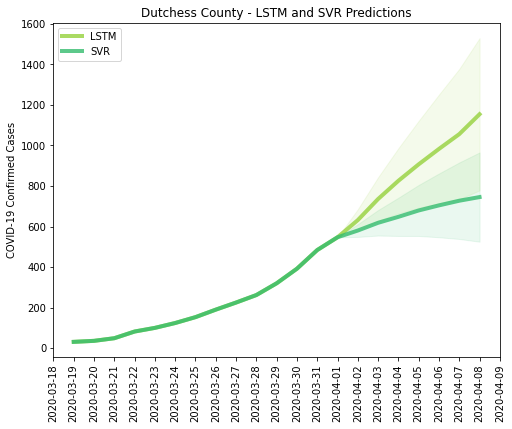

In [34]:

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_dc_data_plot'], linewidth=4, color="#95d13c", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_dc_data_plot'], linewidth=4, color="#34bc6e", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['svr_dc_cum_sdt_error_p'], 
                 cdf['svr_dc_cum_sdt_error_n'], 
                 alpha=0.1, color="#34bc6e")
plt.fill_between(cdf.index, cdf['lstm_dc_cum_sdt_error_p'], 
                 cdf['lstm_dc_cum_sdt_error_n'], 
                 alpha=0.1, color="#95d13c")

ax.xaxis.set_major_locator(days)
plt.savefig('dutchess.png', dpi=350, bbox_inches='tight')


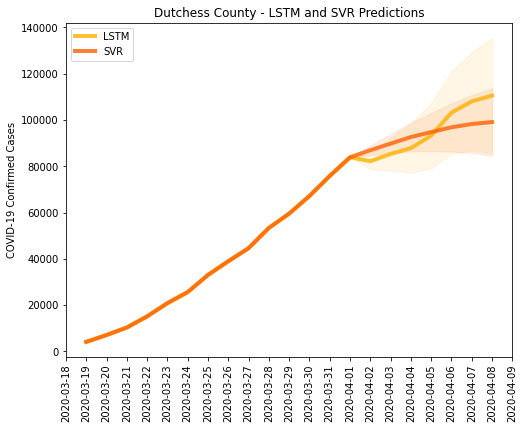

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_nys_data_plot'], linewidth=4, color="#ffb000", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_nys_data_plot'], linewidth=4, color="#fe6100", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['lstm_nys_cum_sdt_error_p'], 
                 cdf['lstm_nys_cum_sdt_error_n'], 
                 alpha=0.1, color="#ffb000")
plt.fill_between(cdf.index, cdf['svr_nys_cum_sdt_error_p'], 
                 cdf['svr_nys_cum_sdt_error_n'], 
                 alpha=0.1, color="#fe6100")

ax.xaxis.set_major_locator(days)
plt.savefig('nys.png', dpi=350, bbox_inches='tight')


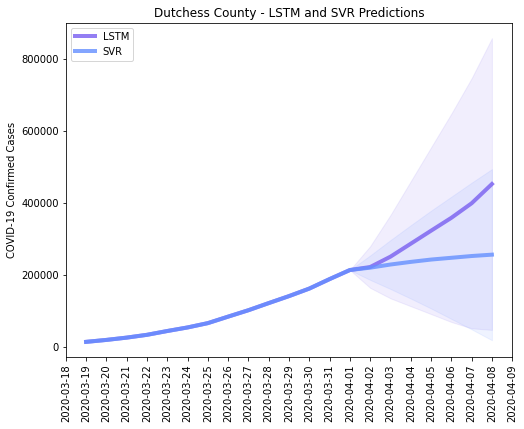

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(cdf['lstm_us_data_plot'], linewidth=4, color="#785ef0", alpha=0.8, label='LSTM')
plt.plot(cdf['svr_us_data_plot'], linewidth=4, color="#648fff", alpha=0.8, label='SVR')
ax.legend(loc='upper left')
plt.ylabel('COVID-19 Confirmed Cases')
plt.title('Dutchess County - LSTM and SVR Predictions')

plt.fill_between(cdf.index, cdf['lstm_us_cum_sdt_error_p'], 
                 cdf['lstm_us_cum_sdt_error_n'], 
                 alpha=0.1, color="#785ef0")
plt.fill_between(cdf.index, cdf['svr_us_cum_sdt_error_p'], 
                 cdf['svr_us_cum_sdt_error_n'], 
                 alpha=0.1, color="#648fff")

ax.xaxis.set_major_locator(days)
plt.savefig('us.png', dpi=350, bbox_inches='tight')
